
## Computing Momentum Flow Lines
### Get Metric and Energy Tensor

In [1]:
%% Alcubierre
gridSize = [1 20 20 20];
worldCenter = (gridSize+1)./2;
velocity = 0.5;
R = 5;
sigma = 0.5;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma);

% Compute energy tensor
EnergyTensor = getEnergyTensor(Metric);


### Get Momentum Flow Lines

In [2]:
%% Get momentum flow lines

% Define the inputs
ngridsteps = 4;
stepSize = 0.75;
maxSteps = 10000;
scaleFactor = 1/max(abs(EnergyTensor.tensor{1,2}),[],'all');

% Build a grid of starting points using meshgrid
[X,Y,Z] = meshgrid(1:ngridsteps:gridSize(2),1:ngridsteps:gridSize(3),1:ngridsteps:gridSize(4));

% Assign the starting points into the cell format
startPoints = cell(1,3);
startPoints{1} = X;
startPoints{2} = Y;
startPoints{3} = Z;

% Find the flowline paths
[Paths] = getMomentumFlowLines(EnergyTensor, startPoints, stepSize, maxSteps, scaleFactor);


### Plot Momentum Flow Lines


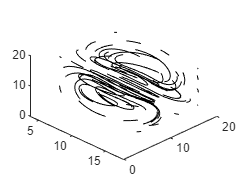

In [3]:
% Setup figure
figure()
hold on

% Define the segment of paths to plot
pathlength = 30; % length of index to plot the path
startIdx = 10; % start index

for i = 1:length(Paths)
    if size(Paths{i},1) > pathlength && length(Paths{i}) > startIdx+pathlength
        plot3(Paths{i}(startIdx:startIdx+pathlength,1), ...
            Paths{i}(startIdx:startIdx+pathlength,2), ...
            Paths{i}(startIdx:startIdx+pathlength,3),'k')
    end
end

% Set the camera view
view(45,45)